# MCMC demo

This is a tiny demo of the MCMC algorithm from the emcee library, which computes the posterior for some parameters based on the likelihood function and priors on the parameters.

In [2]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import numba as nb

100%|██████████| 100/100 [00:00<00:00, 168.91it/s]


1.962706921253352 0.04570914440079373


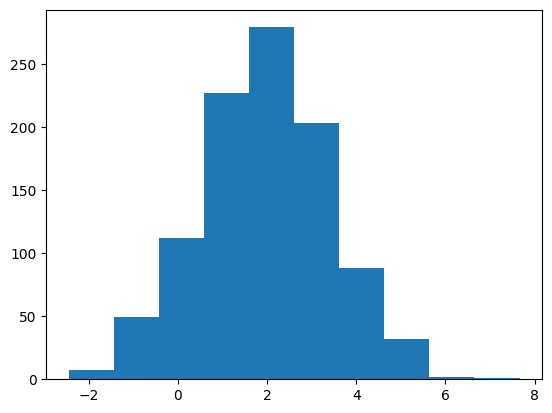

In [3]:
rng = np.random.default_rng(1)

y = 2.0

@nb.njit
def model(mu):
    return mu + np.random.randn()

@nb.njit
def log_prob(mu, y):
    diff = y - model(mu)
    return -0.5 * np.sum(diff ** 2)

nwalkers = 1000
ndim = 1
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[y])

start = rng.normal(size=(nwalkers, ndim))
r = sampler.run_mcmc(start, 100, progress=True)

plt.hist(r.coords)
print(np.mean(r.coords), np.std(r.coords) / np.sqrt(len(r.coords)))